In [1]:
# Analysis of ddG computation from Rosetta

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt
import math
import datetime
date = str(datetime.date.today())
%matplotlib inline

In [2]:
import os
import glob
from scipy import stats as scistats
import numpy as np

In [3]:
%matplotlib inline

In [4]:
def get_single_letter_AA(residue):
    aa = {
        "ALA" : "A",
        "ILE" : "I",
        "LEU" : "L",
        "VAL" : "V",
        "MET" : "M",
        "PHE" : "F",
        "TYR" : "Y",
        "ARG" : "R",
        "LYS" : "K",
        "TRP" : "W",
        "ASN" : "N",
        "GLN" : "Q",
        "ASP" : "D",
        "GLU" : "E",
        "SER" : "S",
        "THR" : "T",
        "GLY" : "G",
        "PRO" : "P",
        "CYS" : "C",
        "HIS" : "H"
        }
    if(isinstance(residue,str)):
        return aa[residue]
    return "NaN"

In [5]:
def get_stats(group):
    return {'std': np.std(group),'mean': group.mean()}

In [6]:
def get_ddG_monomer_results(path_and_file_name):
    header_text=[
    'COMPLEX:', 'Round', 'Baseline', 'Total Energy', 'fa_atr_label:', 'fa_atr:',
       'fa_rep_label:', 'fa_rep:', 'fa_sol_label:', 'fa_sol:', 'fa_intra_rep_label:', 'fa_intra_rep:',
       'fa_intra_sol_xover4_label:', 'fa_intra_sol_xover4', 'lk_ball_wtd_label:', 'lk_ball_wtd:', 'fa_elec_label:',
       'fa_elec:', 'hbond_sr_bb_label:', 'hbond_sr_bb:', 'hbond_lr_bb_label:', 'hbond_lr_bb:',
       'hbond_bb_sc_label:', 'hbond_bb_sc:', 'hbond_sc_label:', 'hbond_sc:', 'dslf_fa13_label:',
       'dslf_fa13:', 'omega_label:', 'omega:', 'fa_dun_label:', 'fa_dun:', 'p_aa_pp_label:', 'p_aa_pp:',
       'yhh_planarity_label:', 'yhh_planarity:', 'ref_label:', 'ref:', 'rama_prepro_label:', 'rama_prepro:',
       'cart_bonded_label:', 'cart_bonded:'] 
    df = pd.read_csv(path_and_file_name,skiprows=0,delim_whitespace=True,names=header_text)
    return df

In [7]:
# gather data from computation ordinary ddG computation
dfs = []
directory_w_subdirs = './'
filename="mutfile.ddg"
for ddgfile in glob.glob("*.ddg"):
    dfs.append(get_ddG_monomer_results(ddgfile))
df_tot = pd.concat(dfs,sort=False)

In [8]:
df_tot = df_tot.groupby(["Baseline"])["Total Energy"].apply(get_stats).unstack().reset_index()

In [9]:
df_tot.rename(columns={"mean" : "total (mean n=10)", 
                       "std" : "std( total )"},inplace=True)

In [10]:
df_tot["ddG"] = df_tot["total (mean n=10)"] - df_tot["total (mean n=10)"].loc[(df_tot["Baseline"] == "WT:") ].values[0]

In [11]:
df_tot.columns

Index(['Baseline', 'total (mean n=10)', 'std( total )', 'ddG'], dtype='object')

In [12]:
#df_tot["Baseline"].unique()
cutoff = df_tot[df_tot["Baseline"] == "WT:"]['ddG'].values[0]+2*df_tot[df_tot["Baseline"] == "WT:"]['std( total )'].values[0]
print(cutoff)

7.379489836909824


In [13]:
# position and AA
df_tot["Pos"] = df_tot["Baseline"].str.split("_").str[1].str[0:-4]
df_tot["AA"] = df_tot["Baseline"].str.split("_").str[1].str[-4:-1].apply(get_single_letter_AA)

Text(0.5, 0, 'ddG (kcal/mol)')

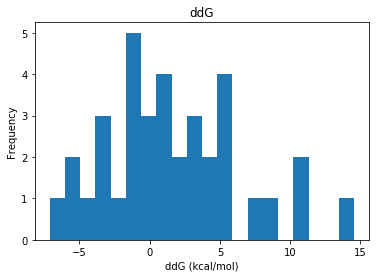

In [14]:
plt.figure();
df_tot["ddG"].plot.hist(bins=20)
plt.title("ddG")
plt.xlabel("ddG (kcal/mol)")

Text(0.5, 1.0, 'Distributions of substitutions < 7.379489836909824 kcal/mol')

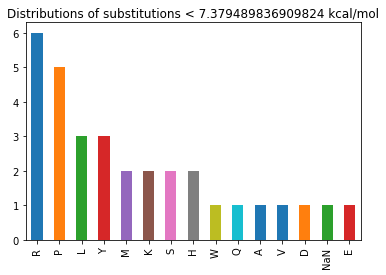

In [15]:
plt.figure()
pd.value_counts(df_tot[df_tot["ddG"] < cutoff]["AA"]).plot.bar()
plt.title("Distributions of substitutions < "+str(cutoff)+" kcal/mol")

In [16]:
df_tot.rename(columns={"ddG" : "ddG_cart"},inplace=True)

In [17]:
print(len(df_tot[df_tot["ddG_cart"] < cutoff]["Pos"].unique()))

30


In [18]:
df_tot["AAPos"] = df_tot["Pos"]+df_tot["AA"]
columns_to_file = ["AAPos","Pos","AA","ddG_cart"]
df_tot[columns_to_file].to_csv(date+"_ddG_cart_rosetta_analysis.csv")

In [19]:
df_tot.sort_values(by="ddG_cart",ascending=True)

,Baseline,total (mean n=10),std( total ),ddG_cart,Pos,AA,AAPos
4,MUT_142PRO:,-1698.081550,0.419793,-7.112525,142,P,142P
15,MUT_258LEU:,-1696.888100,0.609715,-5.919075,258,L,258L
26,MUT_345MET:,-1696.706950,0.511014,-5.737925,345,M,345M
30,MUT_362SER:,-1694.941700,0.055225,-3.972675,362,S,362S
19,MUT_289LYS:,-1694.600300,0.821496,-3.631275,289,K,289K
18,MUT_289ARG:,-1694.223400,0.721398,-3.254375,289,R,289R
28,MUT_359TYR:,-1693.959350,2.590237,-2.990325,359,Y,359Y
24,MUT_339MET:,-1692.929650,0.114378,-1.960625,339,M,339M
5,MUT_179TRP:,-1692.605700,0.397762,-1.636675,179,W,179W
34,MUT_91LYS:,-1692.545500,0.020190,-1.576475,91,K,91K


In [20]:
ddg_calc_to_mut = {}
for files in glob.glob("*"):
    for j in df_tot["AAPos"]:
        try:
            if(str(files).endswith(j)):
                ddg_calc_to_mut[j] = files
        except:
            continue

In [21]:
# write to pymol pml-file
with open("ddG_positions.pml",'w') as f:
    f.write("show cartoon\n")
    f.write("hide lines\n")
    for i in df_tot[df_tot["ddG_cart"] < cutoff]["AAPos"]:
        try:
            pair="create "+ddg_calc_to_mut[i]
            f.write(pair+",resi "+str(i[0:-1])+"\n" )
            f.write("show sticks, "+str(ddg_calc_to_mut[i])+"\n")
            f.write("color cyan, "+str(ddg_calc_to_mut[i])+" and name C*\n")
        except:
            print("NaN for wt")
    f.write("show lines\nhide everything, elem h")

NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
NaN for wt
